In [2]:
from glob  import glob
import pandas as pd
import os
from shutil import copy

In [5]:
df = pd.read_excel("../ME22_Concentration_Particles_Raw data.xlsx")

In [6]:
columns = ["Sample", "Particle Id", "Group", "Score"]
df[columns]

,Sample,Particle Id,Group,Score
0,BO22_Car_p1_sec. analysis,16,Biogenic_Organic,0.961
1,BO22_Car_p1_sec. analysis,22,Biogenic_Organic,0.972
2,BO22_Car_p1_sec. analysis,130,Biogenic_Organic,0.963
3,BO22_Car_p1_sec. analysis,132,Biogenic_Organic,0.963
4,BO22_Car_p1_sec. analysis,150,Biogenic_Organic,0.780
...,...,...,...,...
7415,ME22_TLY_P2,1446,Tire wear,0.973
7416,ME22_TLY_P2,1500,Tire wear,0.989
7417,ME22_TLY_P2,1614,Tire wear,0.384
7418,ME22_TLY_P2,1662,Tire wear,0.964


In [8]:
df[df.Score > 0.55]

,Sample,Particle Id,Group,Score,PM80-1 (µg/m3),Particle # conc. (#particle/m3),CmNormPM10-PM2.5 (µg/m3),Mass deposition (µg/cm2/s),Number deposition (#particles/cm2/s),MassMicrogram (µg),...,Th,Pa,U,Np,Pu,Am,Cm,Bk,Cf,Es
0,BO22_Car_p1_sec. analysis,16,Biogenic_Organic,0.961,0.048785,298.552352,0.042244,6.920258e-15,0.000042,0.000163,...,0,0,0,0,0,0,0,0,0,0
1,BO22_Car_p1_sec. analysis,22,Biogenic_Organic,0.972,0.042139,400.144760,0.038623,4.459923e-15,0.000042,0.000105,...,0,0,0,0,0,0,0,0,0,0
2,BO22_Car_p1_sec. analysis,130,Biogenic_Organic,0.963,0.030344,771.693922,0.028766,1.665273e-15,0.000042,0.000039,...,0,0,0,0,0,0,0,0,0,0
3,BO22_Car_p1_sec. analysis,132,Biogenic_Organic,0.963,0.023648,1270.575606,0.019901,7.882287e-16,0.000042,0.000019,...,0,0,0,0,0,0,0,0,0,0
4,BO22_Car_p1_sec. analysis,150,Biogenic_Organic,0.780,0.021368,1556.176408,0.015646,5.815202e-16,0.000042,0.000014,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7414,ME22_TLY_P2,1351,Tire wear,0.676,0.031205,177.285002,0.024791,3.143390e-15,0.000032,0.000176,...,0,0,0,0,0,0,0,0,0,0
7415,ME22_TLY_P2,1446,Tire wear,0.973,0.035577,136.383237,0.023998,4.658701e-15,0.000032,0.000261,...,0,0,0,0,0,0,0,0,0,0
7416,ME22_TLY_P2,1500,Tire wear,0.989,0.024097,297.297857,0.022019,1.447500e-15,0.000032,0.000081,...,0,0,0,0,0,0,0,0,0,0
7418,ME22_TLY_P2,1662,Tire wear,0.964,0.017879,540.049822,0.016994,5.912288e-16,0.000032,0.000033,...,0,0,0,0,0,0,0,0,0,0


## csv dataset for text dataLoaders

In [4]:
root_dir = "ME22 - Kopie"

In [10]:
in_dir = 'ParticleClassifier/Data/Particles'

In [5]:
chemic_features = ["Si", "C", "O", "P", "Cl", "Na", "Ca", "Al", "Fe"]
morph_features = ["GrayMean", "Solidity", "Irregularity", "ShapeFactor", "LengthMicron", "Eccentricity", "GrayKurt", "FractalDimR", "AreaMicron2", "GrayStd", "Grain3"]


In [6]:
features = columns + morph_features + chemic_features 

In [7]:
# process morphological features
cl_df = df[features].copy()
cl_df["AreaMicron2"] = cl_df["AreaMicron2"].transform('log')
cl_df["Irregularity"] = cl_df["Irregularity"].transform('log')
cl_df["LengthMicron"] = cl_df["LengthMicron"].transform('log')
cl_df = cl_df.rename(columns={"AreaMicron2": "LogAreaMicron2", 
                      "Irregularity": "LogIrregularity", 
                      "LengthMicron": "LogLengthMicron"})
cl_df

,Sample,Particle Id,Group,Score,GrayMean,Solidity,LogIrregularity,ShapeFactor,LogLengthMicron,Eccentricity,...,Grain3,Si,C,O,P,Cl,Na,Ca,Al,Fe
0,BO22_Car_p1_sec. analysis,16,Biogenic_Organic,0.961,0.214,0.782,1.779181,4.220,2.793065,0.975,...,0.025,0.000,58.245,38.407,1.272,0.293,0.000,0.000,0.000,0.000
1,BO22_Car_p1_sec. analysis,22,Biogenic_Organic,0.972,0.234,0.863,1.495373,2.724,2.570549,0.972,...,0.010,0.000,58.868,36.102,1.123,0.505,0.354,0.000,0.000,0.000
2,BO22_Car_p1_sec. analysis,130,Biogenic_Organic,0.963,0.201,0.956,0.273837,1.141,1.545006,0.541,...,0.000,0.000,66.937,31.014,0.658,0.000,0.309,0.000,0.000,0.000
3,BO22_Car_p1_sec. analysis,132,Biogenic_Organic,0.963,0.238,0.973,0.413433,1.087,1.344951,0.721,...,0.000,0.000,56.770,32.504,0.956,0.000,0.000,0.000,0.000,0.000
4,BO22_Car_p1_sec. analysis,150,Biogenic_Organic,0.780,0.227,0.973,0.093490,1.010,1.099612,0.267,...,0.000,0.270,85.876,13.854,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7415,ME22_TLY_P2,1446,Tire wear,0.973,0.315,0.796,0.954357,2.153,2.265714,0.767,...,0.016,10.747,34.808,33.543,0.000,0.000,0.486,1.759,5.756,10.721
7416,ME22_TLY_P2,1500,Tire wear,0.989,0.300,0.917,0.509825,1.274,1.640549,0.703,...,0.023,5.470,44.663,32.910,0.221,0.000,0.298,2.212,2.763,8.667
7417,ME22_TLY_P2,1614,Tire wear,0.384,0.203,0.664,1.010873,5.696,2.006199,0.524,...,0.012,9.509,36.093,31.405,0.000,0.000,0.519,0.783,4.940,11.889
7418,ME22_TLY_P2,1662,Tire wear,0.964,0.312,0.829,0.692647,1.789,1.420937,0.395,...,0.032,4.181,32.476,35.681,0.000,0.000,0.508,12.860,1.610,10.304


In [8]:
dest_dir = "./ParticlesDB/csv/Images/"

In [11]:
#### RUN WITH CAUTION
names = []
for _, particle in df[columns].iterrows():
    im_path = os.path.join(root_dir, particle['Sample'], in_dir, 
                           str(particle['Particle Id']) + ".png")
    new_name = "_".join([particle['Group'],
                    particle['Sample'], str(particle['Particle Id'])])+'.png'
    
    new_dir = os.path.join(dest_dir, new_name)
    names.append(new_name)
    #copy(im_path, new_dir)

In [12]:
cl_df.insert(loc=0, column='Image', value=names)

In [ ]:
cl_df.to_csv(os.path.join("./ParticlesDB/csv", "particles_database.csv"), index=False)

In [13]:
cl_df

,Image,Sample,Particle Id,Group,Score,GrayMean,Solidity,LogIrregularity,ShapeFactor,LogLengthMicron,...,Grain3,Si,C,O,P,Cl,Na,Ca,Al,Fe
0,Biogenic_Organic_BO22_Car_p1_sec. analysis_16.png,BO22_Car_p1_sec. analysis,16,Biogenic_Organic,0.961,0.214,0.782,1.779181,4.220,2.793065,...,0.025,0.000,58.245,38.407,1.272,0.293,0.000,0.000,0.000,0.000
1,Biogenic_Organic_BO22_Car_p1_sec. analysis_22.png,BO22_Car_p1_sec. analysis,22,Biogenic_Organic,0.972,0.234,0.863,1.495373,2.724,2.570549,...,0.010,0.000,58.868,36.102,1.123,0.505,0.354,0.000,0.000,0.000
2,Biogenic_Organic_BO22_Car_p1_sec. analysis_130...,BO22_Car_p1_sec. analysis,130,Biogenic_Organic,0.963,0.201,0.956,0.273837,1.141,1.545006,...,0.000,0.000,66.937,31.014,0.658,0.000,0.309,0.000,0.000,0.000
3,Biogenic_Organic_BO22_Car_p1_sec. analysis_132...,BO22_Car_p1_sec. analysis,132,Biogenic_Organic,0.963,0.238,0.973,0.413433,1.087,1.344951,...,0.000,0.000,56.770,32.504,0.956,0.000,0.000,0.000,0.000,0.000
4,Biogenic_Organic_BO22_Car_p1_sec. analysis_150...,BO22_Car_p1_sec. analysis,150,Biogenic_Organic,0.780,0.227,0.973,0.093490,1.010,1.099612,...,0.000,0.270,85.876,13.854,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7415,Tire wear_ME22_TLY_P2_1446.png,ME22_TLY_P2,1446,Tire wear,0.973,0.315,0.796,0.954357,2.153,2.265714,...,0.016,10.747,34.808,33.543,0.000,0.000,0.486,1.759,5.756,10.721
7416,Tire wear_ME22_TLY_P2_1500.png,ME22_TLY_P2,1500,Tire wear,0.989,0.300,0.917,0.509825,1.274,1.640549,...,0.023,5.470,44.663,32.910,0.221,0.000,0.298,2.212,2.763,8.667
7417,Tire wear_ME22_TLY_P2_1614.png,ME22_TLY_P2,1614,Tire wear,0.384,0.203,0.664,1.010873,5.696,2.006199,...,0.012,9.509,36.093,31.405,0.000,0.000,0.519,0.783,4.940,11.889
7418,Tire wear_ME22_TLY_P2_1662.png,ME22_TLY_P2,1662,Tire wear,0.964,0.312,0.829,0.692647,1.789,1.420937,...,0.032,4.181,32.476,35.681,0.000,0.000,0.508,12.860,1.610,10.304


# Create folder class Database

In [14]:
def create_validate_folder(path):
    if not os.path.exists(path):
        os.mkdir(path)
    return

In [15]:
db_df = cl_df.copy()

### remove non confident labels

<AxesSubplot:>

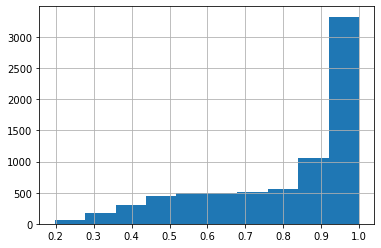

In [16]:
df.Score.hist()

In [17]:
db_df = db_df[db_df.Score > 0.55] #Remove non confident labels

In [1]:
db_df

NameError: name 'db_df' is not defined

### Train test split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(db_df, db_df.Group, test_size=0.30, random_state=42)
print(len(X_train), len(X_test))

4379 1877


In [39]:
train_df = pd.DataFrame(X_train)
train_df.head(5)

,Image,Sample,Particle Id,Group,Score,GrayMean,Solidity,LogIrregularity,ShapeFactor,LogLengthMicron,...,Grain3,Si,C,O,P,Cl,Na,Ca,Al,Fe
6043,Mineral_ME22_TG_P2_728.png,ME22_TG_P2,728,Mineral,0.999,0.378,0.915,0.471253,1.190,0.485508,...,0.050,11.579,18.037,40.593,0.000,0.000,0.000,10.608,10.157,7.523
7146,Biogenic_Organic_ME22_TLY_P2_157.png,ME22_TLY_P2,157,Biogenic_Organic,0.951,0.179,0.896,0.743840,1.279,0.503801,...,0.080,0.000,83.889,13.961,0.000,0.000,0.000,0.919,0.000,0.000
4155,Tire wear_ME22_MA_P3_1131.png,ME22_MA_P3,1131,Tire wear,0.995,0.298,0.897,0.601032,1.942,2.978128,...,0.012,9.445,38.237,31.504,0.343,0.339,0.741,4.048,3.848,8.089
2409,Mineral_ME22_MA_P1_1291.png,ME22_MA_P1,1291,Mineral,0.907,0.347,0.913,0.394741,1.696,2.589342,...,0.019,20.270,0.000,51.022,0.000,0.000,2.196,0.000,14.512,8.063
1564,Biogenic_Organic_CA22_UV_p1_sec. analysis_2212...,CA22_UV_p1_sec. analysis,2212,Biogenic_Organic,0.882,0.183,0.856,0.442118,1.571,0.733329,...,0.037,0.000,77.828,20.522,0.000,0.000,0.000,0.000,0.000,0.000


In [40]:
dest_dir = "./ParticlesDB/folders/"

In [41]:
## RUN WITH CAUTION
create_validate_folder(dest_dir)
create_validate_folder(os.path.join(dest_dir, 'train'))

for _, particle in train_df.iterrows():
    #print(particle)
    im_path = os.path.join(root_dir, particle['Sample'], in_dir, 
                           str(particle['Particle Id']) + ".png")
    #print(os.path.exists(im_path))
    
    create_validate_folder(os.path.join(dest_dir, 'train', particle['Group']))
    
    new_name = os.path.join(dest_dir, 'train', particle['Group'], "_".join([particle['Group'],
                                particle['Sample'], str(particle['Particle Id'])])+'.png')
    copy(im_path, new_name)

validation split

In [42]:
test_df = pd.DataFrame(X_test)
test_df.head(5)

,Image,Sample,Particle Id,Group,Score,GrayMean,Solidity,LogIrregularity,ShapeFactor,LogLengthMicron,...,Grain3,Si,C,O,P,Cl,Na,Ca,Al,Fe
2721,Mineral_ME22_MA_P1_425.png,ME22_MA_P1,425,Mineral,0.999,0.342,0.809,0.850151,2.166,1.171243,...,0.000,15.133,22.587,44.917,0.000,0.000,0.000,15.882,0.427,0.000
5763,Mineral_ME22_TG_P2_1126.png,ME22_TG_P2,1126,Mineral,0.879,0.333,0.816,0.536493,1.612,1.395997,...,0.010,16.422,15.631,41.772,0.000,0.000,0.454,0.000,10.760,13.442
4716,Mineral_ME22_MA_P3_2065.png,ME22_MA_P3,2065,Mineral,0.601,0.331,0.901,1.108563,1.647,0.764072,...,0.068,0.000,27.407,33.427,0.000,0.000,0.000,27.354,0.000,11.813
1905,Biogenic_Organic_ME22_MA_P1_1520.png,ME22_MA_P1,1520,Biogenic_Organic,0.698,0.159,0.572,1.378010,5.850,1.924103,...,0.052,0.000,59.965,32.968,0.700,0.478,2.009,1.972,0.000,0.000
6514,Biogenic_Organic_ME22_TLY_P2_356.png,ME22_TLY_P2,356,Biogenic_Organic,0.936,0.193,0.794,1.742394,4.097,2.398259,...,0.036,0.000,59.704,36.698,1.486,0.000,0.000,0.000,0.000,0.000


In [43]:
## RUN WITH CAUTION
create_validate_folder(dest_dir)
create_validate_folder(os.path.join(dest_dir, 'val'))

for _, particle in test_df.iterrows():
    #print(particle)
    im_path = os.path.join(root_dir, particle['Sample'], in_dir, 
                           str(particle['Particle Id']) + ".png")
    #print(os.path.exists(im_path))
    
    create_validate_folder(os.path.join(dest_dir, 'val', particle['Group']))
    
    new_name = os.path.join(dest_dir, 'val', particle['Group'], "_".join([particle['Group'],
                                particle['Sample'], str(particle['Particle Id'])])+'.png')
    copy(im_path, new_name)

## Load images

In [7]:
import cv2
import seaborn as sns
from glob import glob
import pandas as pd
def load_img_shapes(path_to_img):
    return cv2.imread(path_to_img).shape

In [48]:
W = []
H = []
names = []
group = []
for particle in glob("/media/lecun/HD/Expor2/ParticlesDB/Class folders/*/*.png"):
    w, h, _ = load_img_shapes(particle)
    names.append(particle.split('/')[-1])
    group.append(particle.split('/')[-2])
    W.append(w)
    H.append(h)
    

In [49]:
shapes_df = pd.DataFrame(zip(names,group, W, H), columns=['particle', 'group', 'w', 'h'])


In [50]:
dist = shapes_df[shapes_df.w < shapes_df.w.quantile(.99)]
dist = dist[dist.h < dist.h.quantile(.99)]

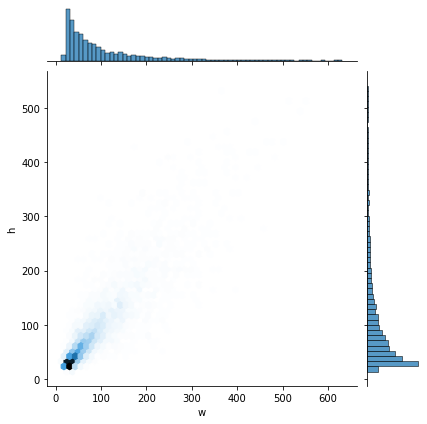

In [53]:
sns.jointplot(
    data=dist,
    x="w", y="h",
    kind="hex"
)


/home/lecun/.local/lib/python3.8/site-packages/seaborn/distributions.py:1182: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


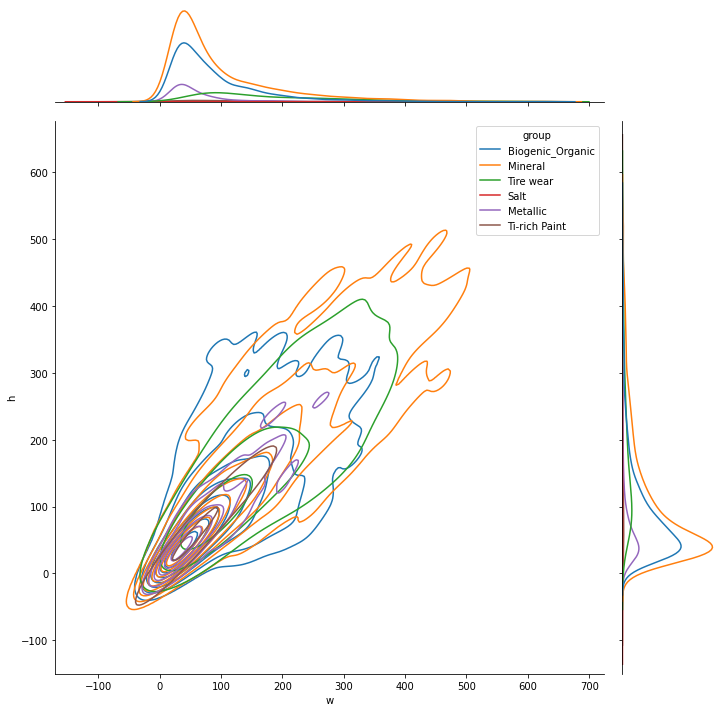

In [54]:
sns.jointplot(
    data=dist,
    x="w", y="h", hue='group',
    kind="kde", height = 10
)